<a href="https://colab.research.google.com/github/Vijay2000kumar/Google_Coolab_files/blob/main/Main_project_of_transactions_file_and_product_file_data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# reading the transactions csv file and take first five rows using head()
transactions_df=pd.read_csv("/content/project_transactions.csv")
transactions_df.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0


In [ ]:
# Calculate the total discount
transactions_df["total_discount"] = transactions_df["RETAIL_DISC"] + transactions_df["COUPON_DISC"]

In [ ]:
transactions_df.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,total_discount
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0,0.00
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0,-0.40
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0,0.00
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0,-0.99
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0,-0.79


In [ ]:
# Calculate the percentage discount
transactions_df["percentage_discount"] = (transactions_df["total_discount"] / transactions_df["SALES_VALUE"]).abs()

In [ ]:
transactions_df.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,total_discount,percentage_discount
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0,0.00,0.000000
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0,-0.40,0.133779
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0,0.00,0.000000
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0,-0.99,0.396000
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0,-0.79,1.316667


In [ ]:
#If the percentage discount is greater than 1, set it equal to 1
transactions_df["percentage_discount"] = np.where(transactions_df["percentage_discount"] > 1, 1, transactions_df["percentage_discount"])
#If it is less than 0, set it to 0.
transactions_df["percentage_discount"] = np.where(transactions_df["percentage_discount"] < 0, 0, transactions_df["percentage_discount"])


In [ ]:
transactions_df.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,total_discount,percentage_discount
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0,0.00,0.000000
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0,-0.40,0.133779
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0,0.00,0.000000
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0,-0.99,0.396000
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0,-0.79,1.000000


In [ ]:
#Drop the individual discount columns (`RETAIL_DISC`, `COUPON_DISC`, `COUPON_MATCH_DISC`)
transactions_df=transactions_df.drop(["RETAIL_DISC","COUPON_DISC","COUPON_MATCH_DISC"], axis=1)

In [ ]:
transactions_df.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,total_discount,percentage_discount
0,1364,26984896261,1,842930,1,2.19,31742,1,0.00,0.000000
1,1364,26984896261,1,897044,1,2.99,31742,1,-0.40,0.133779
2,1364,26984896261,1,920955,1,3.09,31742,1,0.00,0.000000
3,1364,26984896261,1,937406,1,2.50,31742,1,-0.99,0.396000
4,1364,26984896261,1,981760,1,0.60,31742,1,-0.79,1.000000


In [ ]:
#The total sales (sum of `SALES_VALUE`)
total_sales_value=transactions_df['SALES_VALUE'].sum()
print(total_sales_value)

6666243.499999999


In [ ]:
#Total discount (sum of `total_discount`)
total_discount_value=transactions_df['total_discount'].sum()
print(total_discount_value)

-1178658.0799999998


In [ ]:
#Overall percentage discount (sum of total_discount / sum of sales value)
overall_percentage_discount_value=total_discount_value/total_sales_value * 100
print(overall_percentage_discount_value)

-17.68099350106248


In [ ]:
#Total quantity sold (sum of `QUANTITY`)
total_quantity_sold_value=transactions_df['QUANTITY'].sum()
print(total_quantity_sold_value)

216713611


In [ ]:
#Max quantity sold in a single row. Inspect the row as well. Does this have a high discount percentage?
max_quantity_sold_value = transactions_df["QUANTITY"].max()
max_quantity_row = transactions_df[transactions_df["QUANTITY"] == max_quantity_sold_value]
max_quantity_row.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,total_discount,percentage_discount
1442095,630,34749153595,503,6534178,89638,250.0,384,73,-13.45,0.0538


In [ ]:
#Total sales value per basket (sum of sales value / nunique basket_id).
total_sales_value_per_basket = total_sales_value / transactions_df["BASKET_ID"].nunique()
print(total_sales_value_per_basket)

28.61797938516092


In [ ]:
# Total sales value per household (sum of sales value / nunique household_key)
total_sales_value_per_household = total_sales_value/ transactions_df["household_key"].nunique()
print(total_sales_value_per_household)

3175.9140066698424


In [ ]:
transactions_df.columns

Index(['household_key', 'BASKET_ID', 'DAY', 'PRODUCT_ID', 'QUANTITY',
       'SALES_VALUE', 'STORE_ID', 'WEEK_NO', 'total_discount',
       'percentage_discount'],
      dtype='object')

In [ ]:
# reading the product csv file
product_df=pd.read_csv("/content/product.csv")
product_df.head()


,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [ ]:
product_df.columns

Index(['PRODUCT_ID', 'MANUFACTURER', 'DEPARTMENT', 'BRAND', 'COMMODITY_DESC',
       'SUB_COMMODITY_DESC', 'CURR_SIZE_OF_PRODUCT'],
      dtype='object')

In [ ]:
join_df = pd.merge(transactions_df, product_df, how='inner', on='PRODUCT_ID')
print(join_df)

         household_key    BASKET_ID  DAY  PRODUCT_ID  QUANTITY  SALES_VALUE  \
0                 1364  26984896261    1      842930         1         2.19   
1                  924  27266866188   24      842930         3         5.00   
2                 1652  27469418544   41      842930         1         1.67   
3                  472  27554018374   48      842930         1         1.66   
4                 1426  27649132127   56      842930         1         1.67   
...                ...          ...  ...         ...       ...          ...   
2146306           1598  42305362535  711       92130         1         0.99   
2146307           1598  42305362535  711      114102         1         8.89   
2146308           1598  42305362535  711      133449         1         6.99   
2146309           1598  42305362535  711     6923644         1         4.50   
2146310           1598  42305362535  711    14055192         1         6.99   

         STORE_ID  WEEK_NO  total_discount  percent

In [ ]:
# Join the two DataFrames on the `Product ID` column
joined_df = transactions_df.merge(product_df, on="PRODUCT_ID")
joined_df.head()


,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,total_discount,percentage_discount,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,1364,26984896261,1,842930,1,2.19,31742,1,0.00,0.000000,69,GROCERY,Private,CONVENIENT BRKFST/WHLSM SNACKS,GRANOLA BARS,10 OZ
1,924,27266866188,24,842930,3,5.00,400,4,-1.57,0.314000,69,GROCERY,Private,CONVENIENT BRKFST/WHLSM SNACKS,GRANOLA BARS,10 OZ
2,1652,27469418544,41,842930,1,1.67,438,7,-0.52,0.311377,69,GROCERY,Private,CONVENIENT BRKFST/WHLSM SNACKS,GRANOLA BARS,10 OZ
3,472,27554018374,48,842930,1,1.66,389,8,-0.53,0.319277,69,GROCERY,Private,CONVENIENT BRKFST/WHLSM SNACKS,GRANOLA BARS,10 OZ
4,1426,27649132127,56,842930,1,1.67,358,9,-0.52,0.311377,69,GROCERY,Private,CONVENIENT BRKFST/WHLSM SNACKS,GRANOLA BARS,10 OZ


Product Analysis

* Which products had the most sales by sales_value? Plot  a horizontal bar chart.
* Did the top 10 selling items have a higher than average discount rate?
* What was the most common `PRODUCT_ID` among rows with the households in our top 10 households by sales value?
* Look up the names of the  top 10 products by sales in the `products.csv` dataset.
* Look up the product name of the item that had the highest quantity sold in a single row.

In [ ]:
# Get the top 10 selling items by sales value
top_10_selling_items = joined_df.sort_values("QUANTITY", ascending=False).head(10)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

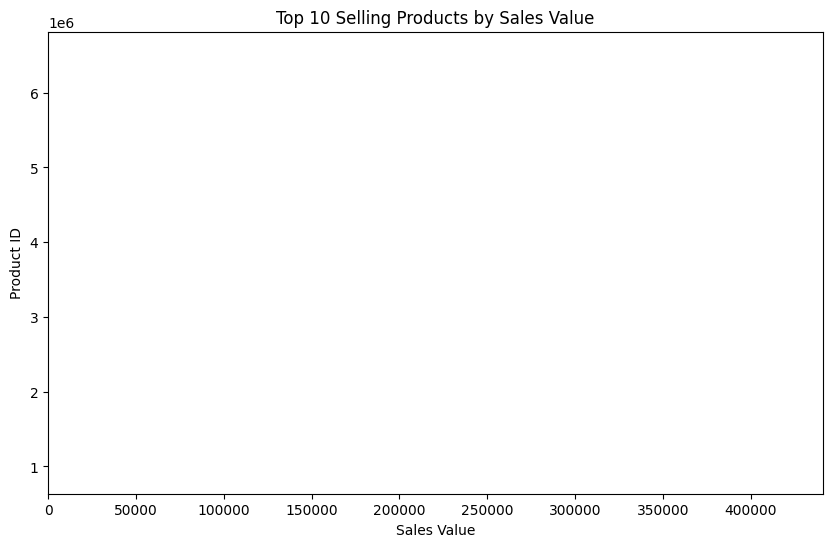

In [ ]:
# Step 1: Find products with the most sales by sales_value and plot a horizontal bar chart
top_selling_products = transactions_df.groupby('PRODUCT_ID')['SALES_VALUE'].sum().nlargest(10)
top_selling_products_info = product_df[product_df['PRODUCT_ID'].isin(top_selling_products.index)]
top_selling_products_info = top_selling_products_info.merge(top_selling_products, on='PRODUCT_ID')
top_selling_products_info.sort_values(by='SALES_VALUE', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
plt.barh(top_selling_products_info['PRODUCT_ID'], top_selling_products_info['SALES_VALUE'])
plt.xlabel('Sales Value')
plt.ylabel('Product ID')
plt.title('Top 10 Selling Products by Sales Value')
plt.show()

In [ ]:
# Step 2: Check if the top 10 selling items had a higher than average discount rate
average_discount_rate = transactions_df['percentage_discount'].mean()
top_selling_items_discount_rate = transactions_df[transactions_df['PRODUCT_ID'].isin(top_selling_products.index)]['percentage_discount'].mean()
top_10_items_have_higher_discount = top_selling_items_discount_rate > average_discount_rate
print("Did the top 10 selling items have a higher than average discount rate?", top_10_items_have_higher_discount)


Did the top 10 selling items have a higher than average discount rate? False


In [ ]:
# Step 3: Find the most common PRODUCT_ID among rows with the households in the top 10 households by sales value
top_10_households = transactions_df.groupby('household_key')['SALES_VALUE'].sum().nlargest(10)
most_common_product_id_in_top_10_households = transactions_df[transactions_df['household_key'].isin(top_10_households.index)]['PRODUCT_ID'].mode().values[0]
print("Most common PRODUCT_ID among rows with the top 10 households by sales value:", most_common_product_id_in_top_10_households)


Most common PRODUCT_ID among rows with the top 10 households by sales value: 1082185


In [ ]:
# Step 4: Look up the names of the top 10 products by sales in the products.csv dataset
top_selling_products_info = top_selling_products_info[['PRODUCT_ID', 'COMMODITY_DESC', 'SUB_COMMODITY_DESC', 'CURR_SIZE_OF_PRODUCT']]
print("Top 10 Selling Products:")
print(top_selling_products_info)

Top 10 Selling Products:
   PRODUCT_ID       COMMODITY_DESC              SUB_COMMODITY_DESC  \
9     6534178    COUPON/MISC ITEMS           GASOLINE-REG UNLEADED   
7     6533889    COUPON/MISC ITEMS           GASOLINE-REG UNLEADED   
2     1029743  FLUID MILK PRODUCTS           FLUID MILK WHITE ONLY   
3     1082185       TROPICAL FRUIT                         BANANAS   
6     6533765                 FUEL           GASOLINE-REG UNLEADED   
8     6534166    COUPON/MISC ITEMS           GASOLINE-REG UNLEADED   
4     1106523  FLUID MILK PRODUCTS           FLUID MILK WHITE ONLY   
0      916122              CHICKEN         CHICKEN BREAST BONELESS   
1      995242  FLUID MILK PRODUCTS           FLUID MILK WHITE ONLY   
5     5569230          SOFT DRINKS  SOFT DRINKS 12/18&15PK CAN CAR   

  CURR_SIZE_OF_PRODUCT  
9                       
7                       
2                 1 GA  
3                40 LB  
6                       
8                       
4                 1 GA  
0   

In [ ]:
# Step 5: Find the product name of the item that had the highest quantity sold in a single row
max_quantity_product_id = transactions_df.loc[transactions_df['QUANTITY'].idxmax(), 'PRODUCT_ID']
product_name_highest_quantity = product_df.loc[product_df['PRODUCT_ID'] == max_quantity_product_id, 'COMMODITY_DESC'].values[0]
print("Product name of the item with the highest quantity sold in a single row:", product_name_highest_quantity)

Product name of the item with the highest quantity sold in a single row: COUPON/MISC ITEMS
